In [1]:
import lr_debug
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Modified from lr_debug.py

from __future__ import division
import numpy as np

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y, max_iter = 1e5):
    m, n = X.shape
    theta = np.zeros(n)
    theta_list = []
    learning_rate = 10
    
    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        norm = np.linalg.norm(prev_theta - theta)
        if i % 10000 == 0:
            print('Finished {0} iterations; Diff theta: {1}; theta: {2}; Grad: {3}'.format(
                i, norm, theta, grad))
            theta_list.append(theta)
        if norm < 1e-15:
            print('Converged in %d iterations' % i)
            theta_list.append(theta)
            break
        if i == max_iter:
            print('Stopped in %d iterations' % i)
            break
    return theta_list

In [3]:
print('==== Training model on data set A ====')
Xa, Ya = load_data('data_a.txt')
theta_list_a = logistic_regression(Xa, Ya)

==== Training model on data set A ====
Finished 10000 iterations; Diff theta: 7.226491864936692e-07; theta: [-20.81394174  21.45250215  19.85155266]; Grad: [ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08]
Finished 20000 iterations; Diff theta: 5.3329818166826493e-11; theta: [-20.81437785  21.45295156  19.85198173]; Grad: [ 3.06368792e-12 -3.15720109e-12 -3.01427074e-12]
Finished 30000 iterations; Diff theta: 6.153480596427404e-15; theta: [-20.81437788  21.45295159  19.85198176]; Grad: [ 1.98777723e-16 -2.93366708e-16 -1.89343630e-16]
Converged in 30368 iterations


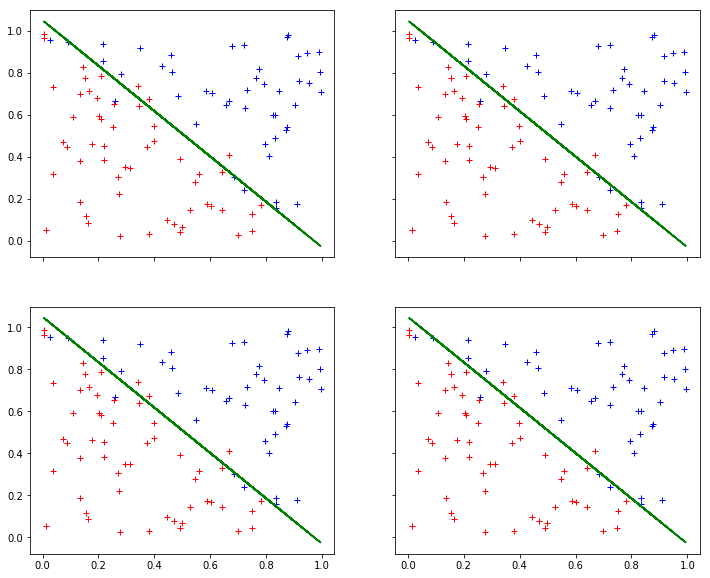

In [4]:
ncols = 2
num_subplots = len(theta_list_a)
if num_subplots % ncols == 0:
    nrows = num_subplots // ncols
else:
    nrows = num_subplots // ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12,10), sharex = True, sharey=True)

x1 = Xa[:,1]
x1 = x1.reshape((x1.shape[0],1))
x2 = Xa[:,2]
x2 = x2.reshape((x2.shape[0],1))
y = Ya

i = 0
j = 0
k = 0
while (i * ncols + j) < num_subplots:
    theta = theta_list_a[k]
    slope = -theta[1]/theta[2]
    intercept = -theta[0]/theta[2]
    y_line = slope * x1 + intercept
    axes[i, j].plot(x1[y==1], x2[y==1], 'b+', x1[y==-1], x2[y==-1], 'r+')
    axes[i, j].plot(x1, y_line, '-g', label='decision boundary')    
    j += 1
    k += 1
    if j % ncols == 0:
        i += 1
        j = 0

In [5]:
print('\n==== Training model on data set B ====')
Xb, Yb = load_data('data_b.txt')
theta_list_b = logistic_regression(Xb, Yb)


==== Training model on data set B ====
Finished 10000 iterations; Diff theta: 0.003361039469518825; theta: [-52.74109217  52.92982273  52.69691453]; Grad: [ 0.00019399 -0.00019355 -0.00019461]
Finished 20000 iterations; Diff theta: 0.002173205351041188; theta: [-68.10040977  68.26496086  68.09888223]; Grad: [ 0.00012541 -0.00012529 -0.0001257 ]
Finished 30000 iterations; Diff theta: 0.0016644896054955345; theta: [-79.01759142  79.17745526  79.03755803]; Grad: [ 9.60445104e-05 -9.60553587e-05 -9.61981110e-05]
Finished 40000 iterations; Diff theta: 0.00137040952812708; theta: [-87.70771189  87.87276307  87.73897393]; Grad: [ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05]
Finished 50000 iterations; Diff theta: 0.0011758957242939641; theta: [-95.01838735  95.1948202   95.0551918 ]; Grad: [ 6.78328688e-05 -6.79700947e-05 -6.78680755e-05]
Finished 60000 iterations; Diff theta: 0.0010366393703263115; theta: [-101.37921493  101.57119731  101.41805781]; Grad: [ 5.97905761e-05 -5.99622968e-05 

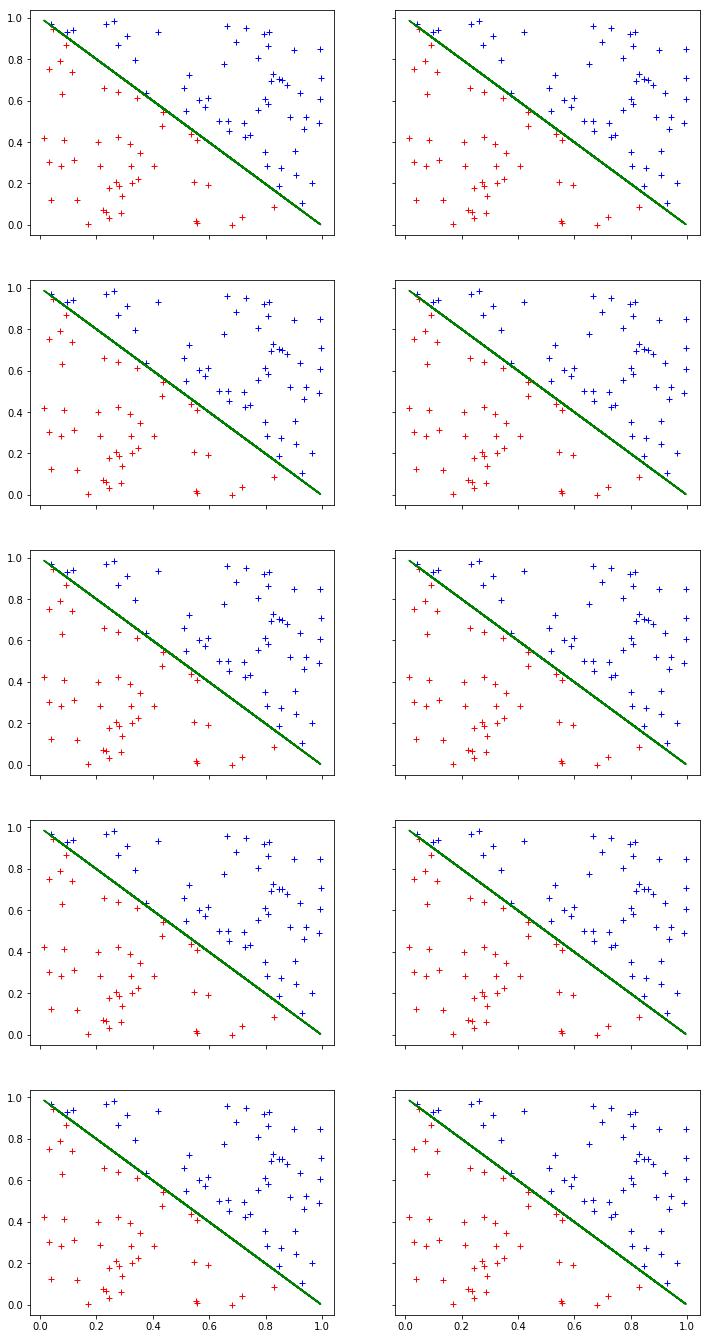

In [6]:
ncols = 2
num_subplots = len(theta_list_b)
if num_subplots % ncols == 0:
    nrows = num_subplots // ncols
else:
    nrows = num_subplots // ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(12,24), sharex = True, sharey=True)

x1 = Xb[:,1]
x1 = x1.reshape((x1.shape[0],1))
x2 = Xb[:,2]
x2 = x2.reshape((x2.shape[0],1))
y = Yb

i = 0
j = 0
k = 0
while (i * ncols + j) < num_subplots:
    theta = theta_list_b[k]
    slope = -theta[1]/theta[2]
    intercept = -theta[0]/theta[2]
    y_line = slope * x1 + intercept
    axes[i, j].plot(x1[y==1], x2[y==1], 'b+', x1[y==-1], x2[y==-1], 'r+')
    axes[i, j].plot(x1, y_line, '-g', label='decision boundary')    
    j += 1
    k += 1
    if j % ncols == 0:
        i += 1
        j = 0

To check if dataset B has the problem of complete separation (i.e., linearly separable on the x1-x2 plane).

In [7]:
theta = theta_list_b[-1]
theta = theta.reshape((theta.shape[0], 1))

Yb = Yb.reshape((Yb.shape[0],1))

Yb_hat = np.zeros((len(Yb), 1))
Yb_hat[np.matmul(Xb, theta) > 0] = 1
Yb_hat[np.matmul(Xb, theta) <= 0] = -1

In [8]:
print(Yb_hat == Yb)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
